# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

#from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/opt/pyenv/versions/3.7.2/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
field = 'SPIRE-NEP'

In [3]:
#Open small file containing only id ra dec field photo_z photo_zerr
desi_photoz = Table.read('../../dmu0/dmu0_DESI/data/dr8_red.fits')
desi_photoz = desi_photoz[desi_photoz['field'] == field.ljust(18)]

In [4]:
desi_photoz.write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z.fits'.format(field), overwrite=True)

In [5]:
desi_photoz

ID,RA,DEC,field,photo_z,photo_zerr
int64,float64,float64,bytes18,float32,float32
8001640050000008,265.0088789729025,68.87562236621886,SPIRE-NEP,0.48694804,0.104289986
8001640050000015,265.018714609723,68.87523548392299,SPIRE-NEP,0.49994567,0.0959891
8001640050000023,264.90664582017814,68.87614747419336,SPIRE-NEP,0.54493815,0.03573145
8001640050000031,265.1157533311888,68.8768867896115,SPIRE-NEP,0.8401859,0.080062814
8001640050000036,264.9233673045657,68.87708275567836,SPIRE-NEP,0.58014846,0.1620231
8001640050000041,264.6848649571099,68.87729075901186,SPIRE-NEP,0.6860686,0.041592896
8001640050000042,265.0902975148634,68.87741901912275,SPIRE-NEP,0.69454134,0.040210214
8001640050000044,264.744676757926,68.87905466661792,SPIRE-NEP,0.49533355,0.0226374
8001640050000048,264.8619382014994,68.87790398156072,SPIRE-NEP,0.89777684,0.073775575


In [6]:
ml = Table.read('../../dmu1/dmu1_ml_SPIRE-NEP/data/master_catalogue_spire-nep_20180220.fits')

In [7]:
ml

help_id,field,ra,dec,hp_idx,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,flag_gpc1_y,flag_cleaned,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,int64,int64,int64,float64,bool,int64,float64
HELP_J173915.579+684920.387,SPIRE-NEP,264.814910506941,68.8223297362451,190655719,7392.649656415478,43.14107484155039,14.227999687194824,0.006335999816656113,6885.885923697371,3.900413383672567,14.305100440979004,0.0006150000263005495,False,11502.703942155389,0.39199214554663814,13.748000144958496,3.7000001611886546e-05,10721.116635628732,37.463903786626574,13.824399948120117,0.003794000018388033,False,13242.190731341167,27.381162531005785,13.595100402832031,0.002245000097900629,12439.415011830086,19.087569591075386,13.663000106811523,0.0016659999964758754,False,13891.84270354754,21.341826578659003,13.543100357055664,0.0016680000117048621,13149.822983847242,16.03553878213893,13.602700233459473,0.001323999953456223,False,14232.46188062854,40.951210132452125,13.516799926757812,0.0031240000389516354,13428.889023883086,40.185139857741724,13.579899787902832,0.003249000059440732,False,False,3,1,1,0.0388039921120539,False,-99,nan
HELP_J173946.809+685156.285,SPIRE-NEP,264.94503776694097,68.8656346562451,190655913,7249.70029559321,6.41013174052051,14.249199867248535,0.0009599999757483602,6878.915727562524,2.7053504765818537,14.30620002746582,0.00042699999175965786,False,9736.436587413442,4.062317917145358,13.928999900817871,0.0004529999860096723,9094.941212628544,40.18327154789176,14.003000259399414,0.0047969999723136425,False,10496.393783372483,32.43458246053875,13.847399711608887,0.0033549999352544546,10003.684547753295,25.531256010203315,13.8996000289917,0.002770999912172556,False,11005.257008862356,25.786534719666268,13.795999526977539,0.00254400004632771,10527.371434130546,30.47473940215369,13.844200134277344,0.0031429999507963657,False,11072.353931850152,32.04216205769136,13.789400100708008,0.0031419999431818724,10614.997008224147,20.032609026459976,13.835200309753418,0.0020490000024437904,False,False,3,1,1,0.03758876708462011,False,-99,nan
HELP_J174207.370+685439.924,SPIRE-NEP,265.530709446941,68.9110899862451,190657257,2237.6897934973695,8.264563331426242,15.525500297546387,0.004009999800473452,2160.9259884151043,4.838385977158423,15.563400268554688,0.0024309998843818903,False,5336.298841849184,3.573141683116153,14.581899642944336,0.0007270000060088933,5056.383749012703,9.374745215024907,14.640399932861328,0.0020129999611526728,False,7997.605471072057,11.203788102742276,14.142600059509277,0.001521000056527555,7685.64216843743,8.161785296524506,14.185799598693848,0.0011530000483617187,False,9714.934578836132,8.92989013415497,13.931400299072266,0.0009980000322684646,9345.44313604996,13.969925949182809,13.97350025177002,0.001623000018298626,False,11099.921323614948,20.71261985245761,13.786700248718262,0.0020260000601410866,10616.955198964131,14.931887107569082,13.835000038146973,0.0015269999857991934,False,False,3,1,1,0.03295716909757666,False,-99,nan
HELP_J174037.838+690156.738,SPIRE-NEP,

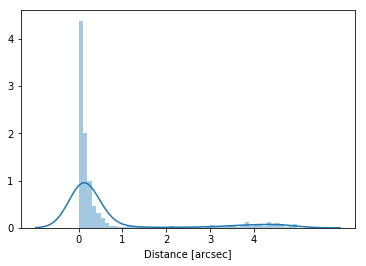

In [8]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['RA']*u.deg, desi_photoz['DEC']*u.deg)
)

In [9]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['RA'].name = 'desi_ra'
desi_photoz['DEC'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [10]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz[has_help & has_z].write('./data/{}_DESI-DR8_Zou_et_al_2019_photo_z_withhelp_id.fits'.format(field), overwrite=True)

In [11]:
photoz[has_help & has_z]

help_id,field,ra,dec,hp_idx,f_ap_gpc1_g,ferr_ap_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,m_gpc1_g,merr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,m_gpc1_r,merr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,m_gpc1_i,merr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,m_gpc1_z,merr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,m_gpc1_y,merr_gpc1_y,flag_gpc1_y,flag_cleaned,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec,flag_merged,field_1,ID,field_2,photo_z,photo_zerr
,,deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,int64,int64,int64,float64,bool,int64,float64,bool,bytes18,int64,bytes18,float32,float32
HELP_J174122.104+685743.508,N/A,265.342101596941,68.9620856862451,190658732,0.12171948535009793,2.107962700071433,26.186599731445312,18.80299949645996,1.395725320399422,2.59139648148797,23.538000106811523,2.015850067138672,False,13.311906693942802,0.9143921804150905,21.089399337768555,0.07457900047302246,11.074396493041862,0.8273645725747296,21.289199829101562,0.0811149999499321,False,30.91720284311122,1.2462432471022455,20.17449951171875,0.043765000998973846,28.116435795176876,1.8740039817746292,20.277599334716797,0.07236599922180176,False,50.54989354861975,2.4615771411078557,19.64069938659668,0.05287100002169609,46.17425232026751,2.1689309189270753,19.73900032043457,0.050999999046325684,False,56.20304254173385,12.789039989541005,19.52560043334961,0.24706000089645386,60.77993389338847,7.325257435748011,19.44059944152832,0.13085399568080902,False,False,0,1,1,0.03473304497584016,False,-99,nan,False,SPIRE-NEP,8001640051001043,SPIRE-NEP,0.50295585,0.03041537
HELP_J173939.413+690420.877,N/A,264.914219866941,69.0724658362451,190678790,4.910438772852296,0.6748925782671196,22.172199249267578,0.14922399818897247,5.707423834043028,0.6036883115322825,22.008899688720703,0.11484099924564362,False,18.66035718098436,1.2491727619328588,20.722700119018555,0.07268200069665909,17.593812318448553,1.2518623988453534,20.78660011291504,0.07725399732589722,False,30.52389089787366,0.8141682101191825,20.188400268554688,0.028960000723600388,29.21999143036795,1.461085425731126,20.23579978942871,0.05429000034928322,False,36.76886246337128,2.5818283334892453,19.986299514770508,0.0762379989027977,32.095202822587396,2.320284311553997,20.133899688720703,0.07849200069904327,False,56.63437852498159,5.7315814882448874,19.51729965209961,0.1098800003528595,51.9613091221371,6.4406999952352,19.61079978942871,0.13457900285720825,False,False,0,1,1,0.036999962524699954,False,-99,nan,False,SPIRE-NEP,8001640050002958,SPIRE-NEP,0.30261317,0.057930544
HELP_J173958.207+691112.319,N/A,264.992529086941,69.1867552262451,190680342,14.733972493183202,0.4178082604678024,20.97920036315918,0.03078800067305565,15.08551107692963,0.9692642478348065,20.95359992980957,0.06976000219583511,False,39.62053902096883,1.3602343195957272,19.90519905090332,0.03727500140666962,38.416704857562316,1.7286056448805491,19.93869972229004,0.048854000866413116,False,71.92507784064239,1.0992769219770466,19.25779914855957,0.016594000160694122,67.77663719576648,1.0654004906929126,19.32229995727539,0.01706700026988983,False,95.67534089564882,6.586900262435276,18.947999954223633,0.07474900037050247,91.94332442716211,5.836178019994032,18.991199493408203,0.06891799718141556,False,112.55368301796825,6.7505078016756626,18.7716007232666,0.06511799991130829,98.97378341650159,